<a href="https://colab.research.google.com/github/GabyPugaBR/AAI2025/blob/main/Part_3_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Coding Exercise - ML Basics**

---

**Part 3: Customer Segmentation** \
K-Means clustering is effective for customer segmentation, which involves grouping customers based on similarities like purchase history, demographics, or behavior.


**Source**: synthetic data created with ChatGPT with the following prompt: "create a downloadable CSV file with 500 records. I want to use it for k-means clustering. Make sure it has the following columns per the example. Add a random gender column, and a couple more appropriate columns for a robust dataset."

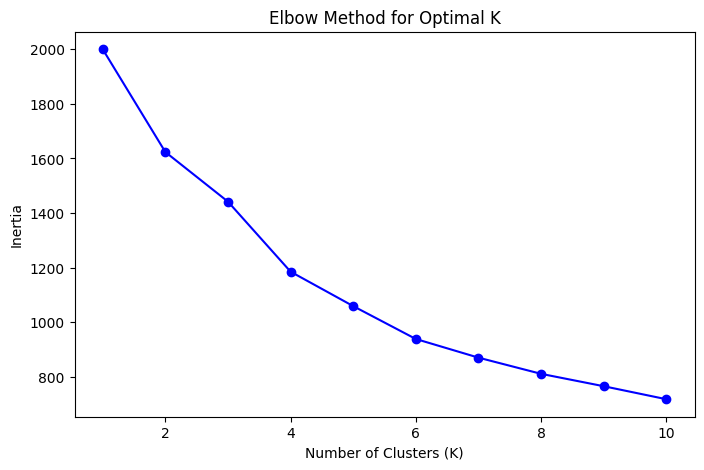

Cluster Characteristics:
         annual_spending  purchase_frequency    age  avg_transaction_value
cluster                                                                   
0                1129.18                8.78  54.95                 161.90
1                1038.57               19.37  34.88                 137.49
2                 958.01                5.89  31.98                 109.00
3                 896.91               14.21  56.27                  74.68

Cluster 1 Strategy:
Premium buyers: Promote high-end products and exclusive offers.

Cluster 2 Strategy:
Frequent shoppers: Offer loyalty rewards or subscription plans.

Cluster 3 Strategy:
Occasional buyers: Send re-engagement campaigns and comeback discounts.

Cluster 4 Strategy:
Value seekers: Provide bulk discounts and multi-buy promotions.


In [19]:
from pandas.core.frame import DataFrame
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Generate sample customer data
# data = {
# 'annual_spending': [500, 1200, 300, 1500, 800, 200, 1000, 600, 1300, 400],
# 'purchase_frequency': [5, 12, 3, 15, 8, 2, 10, 6, 13, 4],
# 'age': [25, 34, 45, 28, 52, 36, 41, 29, 47, 33],
# 'region': ['North', 'South', 'West', 'East', 'South', 'North', 'West', 'East',
# 'South', 'North']
# }
# df = pd.DataFrame(data)

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/customer_clustering_dataset.csv')
# df.info()

# Preprocess data: Select numerical features and scale them so a high number variable doesn't overpower smaller ones
features = ['annual_spending', 'purchase_frequency', 'age', 'avg_transaction_value']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using elbow method
inertia = []
K = range(1, 11)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show() # display to find elbow
plt.savefig('elbow_plot.png')
plt.close()

# Apply K-Means with optimal K (looks like between 4 and 5)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
cluster_summary = df.groupby('cluster')[features].mean().round(2)
print("Cluster Characteristics:")
print(cluster_summary)


# Example of targeted strategies
for cluster in range(optimal_k):
    print(f"\nCluster {cluster + 1} Strategy:")
    if cluster_summary.loc[cluster, 'avg_transaction_value'] > 150:
        print("Premium buyers: Promote high-end products and exclusive offers.")
    elif cluster_summary.loc[cluster, 'purchase_frequency'] > 15:
        print("Frequent shoppers: Offer loyalty rewards or subscription plans.")
    elif cluster_summary.loc[cluster, 'purchase_frequency'] < 8:
        print("Occasional buyers: Send re-engagement campaigns and comeback discounts.")
    else:
        print("Value seekers: Provide bulk discounts and multi-buy promotions.")

# Save cluster assignments to CSV
df.to_csv('customer_segments.csv', index=False)